# Indicators of Heavy Traffic on I-94

## Introduction
We are analyzing data about the westbound traffic on the I-94 interstate highway.
The goal of our analysis is to determine a few indicators of heavy traffic on the I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [176]:
# import our packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
# read our data frame 
metro = pd.read_csv("Metro_interstate_Traffic_Volume.csv")

In [178]:
#Examine the head of the data
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [179]:
# Examine the tail of the data
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [180]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


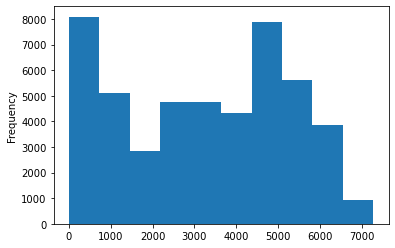

In [181]:
%matplotlib inline
metro["traffic_volume"].plot.hist();

In [182]:
# statistics about the column
metro["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Daytime data: hours from 7 PM to 7 AM (12 hours)

In [183]:
# transform the date_time column to datetime
metro["date_time"]= pd.to_datetime(metro["date_time"])

In [184]:
day = metro.copy()[(metro["date_time"].dt.hour >=7) & (metro['date_time'].dt.hour < 19)]
night = metro.copy()[(metro["date_time"].dt.hour >=19) | (metro['date_time'].dt.hour < 7)]

In [185]:
print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


In [186]:
print(day.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918  


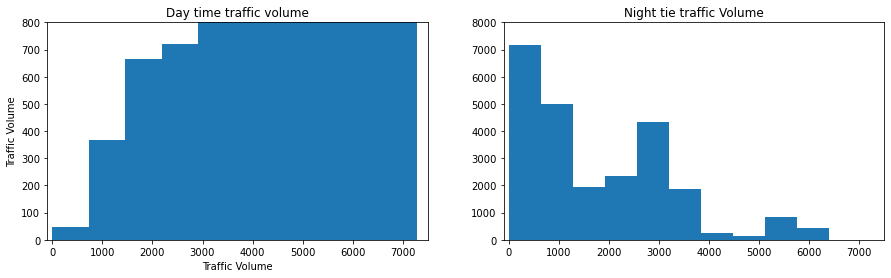

In [187]:
plt.figure(figsize=(15,4));
plt.subplot(1,2,1);
plt.hist(day["traffic_volume"])
plt.title("Day time traffic volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Traffic Volume")
plt.xlim(-100, 7500)
plt.ylim(0,800)

plt.subplot(1,2,2);
plt.hist(night["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0,8000)
plt.title("Night tie traffic Volume")
plt.show()

For the day time, the histogram is skewed to the left meaning most of the traffic happend during the day. While the night is skewed to the right because less traffic volume happened at night.

In [188]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [189]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## Time Indicators

Since the traffic at night is generally low while that at day is high. We decided to focus on the high traffic since which is the day time.

In [190]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [191]:
by_month.shape

(12, 5)

In [192]:
by_month.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609


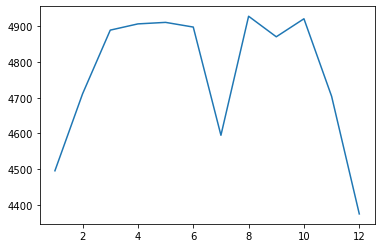

In [193]:
plt.plot(by_month["traffic_volume"]);
plt.show()

The traffic looks low from november to march and high from march to october with one exception which is july. Let us explore the july for more insighrs.

<AxesSubplot:xlabel='year'>

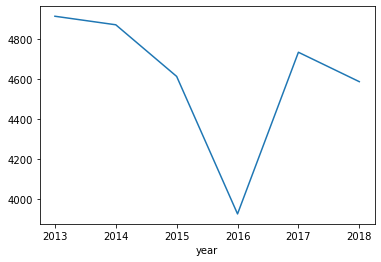

In [194]:
day["year"] = day["date_time"].dt.year
month_july = day[day["month"] == 7]
month_july.groupby("year").mean()["traffic_volume"].plot.line()

Traffic was also heavy in july except for the year 2016. In conclusion we say the months that are warm showed higher traffic than the cold months. 

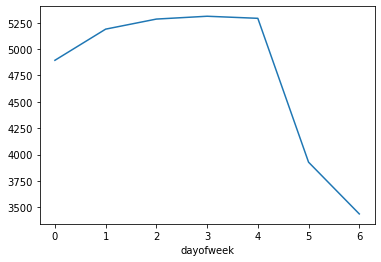

In [195]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

From this graph it is observed that the week days are generally with higher traffic compared to the weeked.

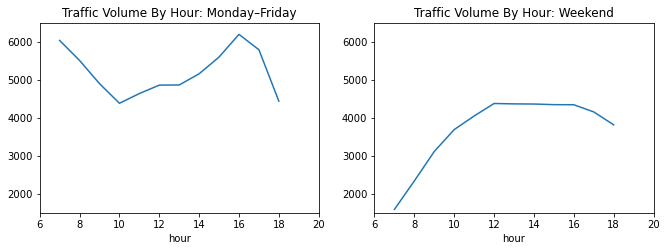

In [196]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 - When most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours. 
To summarise, we found a few time-related indicators of heavy traffic:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Weather is another factor that affects heavy traffic. Lets analyse the traffic to get insights from the datasets. The temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

In [197]:
# Lets check the correction of traffic with weather 
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. Rain_1h, snow_1h, clouds_all all didn;t show any relevant correleation. 

In [200]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,1,13


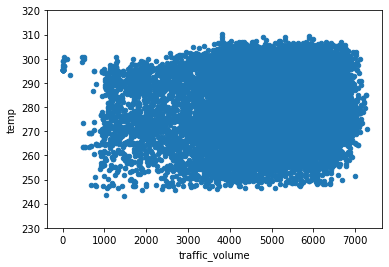

In [202]:
# Correleation between traffic and temp
day.plot.scatter("traffic_volume", "temp")
plt.ylim(230, 320)
plt.show()

From this scatter plots, temperature is not a solid indicator of traffic.

## Weather Types

Lets group by weather main and view the correlation of weather and traffic_volumes

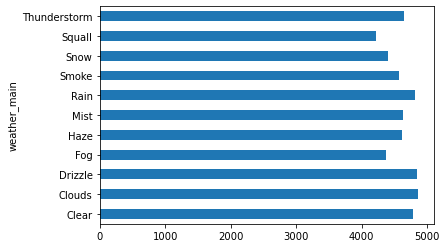

In [204]:
by_weather_main = day.groupby("weather_main").mean()
by_weather_main["traffic_volume"].plot.barh()
plt.show()

All the weather main are below 5,000 cars

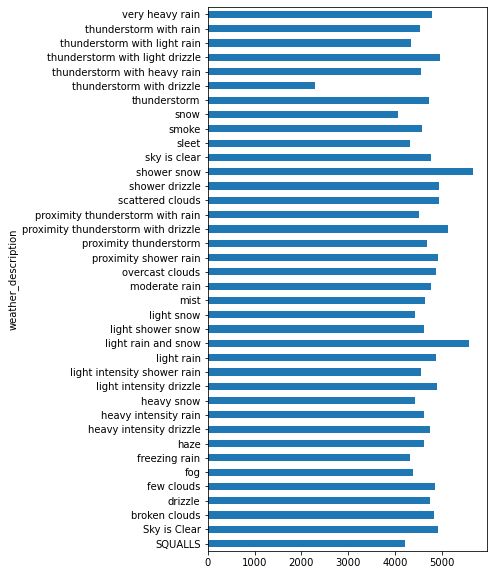

In [205]:
by_weather_description = day.groupby("weather_description").mean()
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))
plt.show()

Weather types that exceed 5000 are shower snow, light rain and snow, proximity thunderstorm with drizzle

# Conclusion

From our analysis, few indicators of traffic are 
- Time indicator: Wrm months usually have high traffic compared to cold months. Also the traffic is alos heavier on business days compared to weekends. 
- Weather indicators: Some weather indicators are shower snow, light rain and snow and proximity thurderstorm with drizzle.